# ProMis - Probabilistic Mission Design

The following shows how to import and setup ProMis to generate Probabilistic Mission Landscapes for a toy-problem.

Generated Probabilistic Mission Landscape.
>> Building the program took 6.775402545928955s.
>> Compilation took 20.33650803565979s.
>> Inference took 1015.8890793323517s.


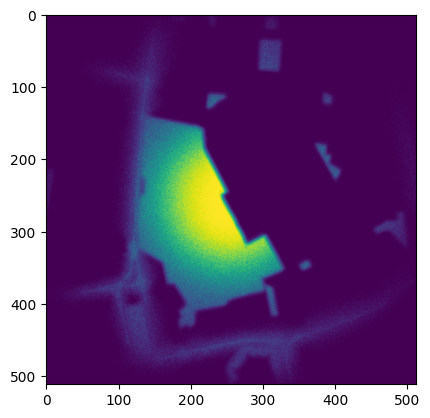

In [1]:
import matplotlib.pyplot as plt
from numpy import eye
from promis import ProMis
from promis.geo import LocationType, PolarLocation, CartesianLocation

# ProMis Parameters
dimensions = (1024.0, 1024.0)  # Meters
resolution = (512, 512)        # Pixels
spatial_samples = 50           # How many maps to generate to compute statistics
model = "Park"                 # Hybrid ProbLog to be used
cache = "../output"            # Where to cache computed data
types = [                      # Which types to load and compute relations for
    LocationType.BUILDING,
    LocationType.PARK,
    LocationType.PRIMARY,
    LocationType.SECONDARY,
    LocationType.TERTIARY,
    LocationType.OPERATOR
]
tu_darmstadt = PolarLocation(latitude=49.878091, longitude=8.654052)

# Setup engine and compute distributional clauses
pmd = ProMis(tu_darmstadt, dimensions, resolution, types, spatial_samples)

# Set parameters that are unrelated to the loaded map data
# Here, we imagine the operator to be situated at the center of the mission area
pmd.add_feature(CartesianLocation(0.0, 0.0, location_type=LocationType.OPERATOR))

# Compute distributional clauses with uncertainty
pmd.compute_distributions(30 * eye(2), cache)

# Generate landscape
with open(f"../models/{model}.pl", "r") as model_file:
    landscape, program_time, compile_time, inference_time = pmd.generate(logic=model_file.read(), n_jobs=8)

# Show result
print(f"Generated Probabilistic Mission Landscape.")
print(f">> Building the program took {program_time}s.")
print(f">> Compilation took {compile_time}s.")
print(f">> Inference took {inference_time}s.")
plt.imshow(landscape.data.T)

## Parameter Inspection

After running the ProMis engine once as above, the estimated parameters have been stored on disk as `pkl` files.
We can now check them out individually, access the raw data or export in different formats.

In [2]:
from pickle import load

with open('../output/distance_1024.0_1024.0_512_512_49.87809099999998_8.654052000000007_50_operator.pkl', 'rb') as pickle:
    park_distance = load(pickle)

visible = (park_distance > 20.0)
visible.save_as_image("../output/visible.png")
visible.save_as_csv("../output/visible.csv")
print(visible.data)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [1]:
from pickle import load

with open('../output/over_1024.0_1024.0_512_512_49.87809099999998_8.654052000000007_50_park.pkl', 'rb') as pickle:
    over_park = load(pickle)

over_park.probability.save_as_image("../output/over_park.png")
over_park.probability.save_as_csv("../output/over_park.csv")
print(over_park.probability.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
